# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2019

Мягкий дедлайн: 07:59MSK 15.10.2019 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 17.10.2019

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

## Реализация градиентного спуска

Реализуйте линейную регрессию с функцией потерь MSE, обучаемую с помощью:

** Задание 1 (1 балл)** Градиентного спуска;

** Задание 2 (1.5 балла)** Стохастического градиентного спуска;

** Задание 3 (2.5 балла)** Метода Momentum.


Во всех пунктах необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускается использовать только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):

    * проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
    * достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).
* Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту);
* Инициализировать веса можно случайным образом или нулевым вектором. 


Ниже приведён шаблон класса, который должен содержать код реализации каждого из методов.

In [133]:
import numpy as np
from sklearn.base import BaseEstimator

class LinearReg(BaseEstimator):
    def __init__(self, gd_type='stochastic', 
                 tolerance=1e-4,max_iter=1000, w0=None, alpha=1e-3, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic' or 'momentum'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        self.loss_history = []
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        if self.w0 == None:
            self.w0 = np.zeros(X.shape[1])
        self.w = self.w0
        self.loss_history.append(self.calc_loss(X, y))
        if self.gd_type == 'full':
            for i in range(self.max_iter):
                #gradient step and new weights
                grad_step = self.eta*self.calc_gradient(X, y)
                self.w = self.w - grad_step
                #append loss history
                self.loss_history.append(self.calc_loss(X, y))
                #checking tolerance for weights
                #if (grad_step**2).sum() < self.tolerance:
                #    break
        elif self.gd_type == 'stochastic':
            for i in range(self.max_iter):
                #gradient step and new weights
                batch_size = 18
                rows = np.random.randint(X.shape[0], size=batch_size)
                X_batch, y_batch = X.iloc[rows, :], y.iloc[rows]
                grad_step = self.eta*self.calc_gradient(X_batch, y_batch)
                self.w = self.w - grad_step
                #append loss history
                self.loss_history.append(self.calc_loss(X_batch, y_batch))
                #checking tolerance for weights
                #if (grad_step**2).sum() < self.tolerance:
                #    break
        elif self.gd_type == 'momentum':
            for i in range(self.max_iter):
                #gradient step and new weights
                if i == 0:
                    grad_step = np.zeros(X.shape[1])
                batch_size = 18
                rows = np.random.randint(X.shape[0], size=batch_size)
                X_batch, y_batch = X.iloc[rows, :], y.iloc[rows]
                grad_step = self.eta*self.calc_gradient(X_batch, y_batch) - self.alpha*grad_step
                self.w = self.w - grad_step
                #append loss history
                self.loss_history.append(self.calc_loss(X_batch, y_batch))
                #checking tolerance for weights
                if (grad_step**2).sum() < self.tolerance:
                    break
            
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return X.dot(self.w)
        pass
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        A = X.dot(self.w) - y
        grad = X.T.dot(A)*2/X.shape[0]
        return grad
        pass

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float 
        """ 
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return ((X.dot(self.w) - y)**2).sum()/X.shape[0]
        pass

In [27]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


** Задание 4 (0 баллов)**. 
* Загрузите данные из домашнего задания 2 ([train.csv](https://www.kaggle.com/c/nyc-taxi-trip-duration/data));
* Разбейте выборку на обучающую и тестовую в отношении 7:3 с random_seed=0;
* Преобразуйте целевую переменную `trip_duration` как $\hat{y} = \log{(y + 1)}$.

In [3]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
import math
df_train = pd.read_csv('train.csv')
df_train['log_trip_duration'] = np.log(df_train['trip_duration'] + 1)

#Data cleaning
df_train.drop('id',inplace=True,axis=1)
df_train.drop('dropoff_datetime',inplace=True,axis=1)
df_train["pickup_datetime"]=pd.to_datetime(df_train["pickup_datetime"])
df_train['day_of_week'] = df_train['pickup_datetime'].dt.day_name()
df_train['hour_of_the_day']=df_train['pickup_datetime'].dt.hour
df_train['month']=df_train['pickup_datetime'].dt.month
df_train['day_of_week']=df_train['day_of_week'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
df_train['store_and_fwd_flag']=df_train['store_and_fwd_flag'].map({'N':0,'Y':1})
def haversine(lat1, lon1, lat2, lon2):
    # distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c
df_train['distance']=df_train.apply(lambda row:haversine(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']),axis=1)
df_train['distance']=df_train['distance'].astype(float)
df_train.drop('pickup_longitude',inplace=True,axis=1)
df_train.drop('pickup_latitude',inplace=True,axis=1)
df_train.drop('dropoff_longitude',inplace=True,axis=1)
df_train.drop('dropoff_latitude',inplace=True,axis=1)
df_train.drop('pickup_datetime',inplace=True,axis=1)

#train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns = ['log_trip_duration', 'trip_duration']),
                                                            df_train['log_trip_duration'], test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [134]:
#full
eta = 1e-3
tolerance = 1e-4
full = LinearReg(gd_type = 'full', eta = eta, tolerance = tolerance)
full.fit(X_train, y_train)
full.predict(X_test)

571578     5.948872
1280332    9.622025
177838     6.081259
1433776    6.916753
757662     4.994833
             ...   
1042944    9.234280
85930      3.493622
61268      9.215319
251164     7.481971
1348190    5.114252
Length: 437594, dtype: float64

In [135]:
print(len(full.loss_history))
full.loss_history[-10:]

1001


[1.968411772062771,
 1.9682174491876483,
 1.9680233743762063,
 1.9678295472995062,
 1.967635967629139,
 1.9674426350372218,
 1.9672495491963942,
 1.9670567097798182,
 1.9668641164611802,
 1.9666717689146813]

In [136]:
#A = X_train_scaled.dot(np.zeros(X_train_scaled.shape[1])) - y_train
A = X_train.dot(full.w) - y_train
grad = X_train.T.dot(A)*2/X_train.shape[0]
print(((eta * grad)**2).sum())
print(grad)

1.9216342073382396e-07
vendor_id            -0.427706
passenger_count       0.073363
store_and_fwd_flag   -0.007613
day_of_week           0.040954
hour_of_the_day       0.011839
month                 0.043982
distance              0.006249
dtype: float64


In [60]:
full.w

array([ 0.00953011,  0.00958804,  0.00072774, -0.02234542,  0.03676376,
        0.02983414,  0.46565774])

In [130]:
#stochastic
eta = 1e-3
tolerance = 1e-4
stochastic = LinearReg(gd_type = 'stochastic', eta = eta, tolerance = tolerance)
stochastic.fit(X_train, y_train)
stochastic.predict(X_test)

571578     6.145147
1280332    9.836212
177838     5.782384
1433776    6.269399
757662     4.666073
             ...   
1042944    8.469792
85930      3.467316
61268      8.395616
251164     7.404607
1348190    4.943981
Length: 437594, dtype: float64

In [131]:
print(len(stochastic.loss_history))
stochastic.loss_history

5001


[42.45540471238833,
 14.121016848293065,
 5.176440711987471,
 7.485111955899037,
 6.115403663443519,
 5.416700431168257,
 6.84012710136543,
 4.456616333681877,
 3.5021660878582797,
 2.5857579264421933,
 3.853294635246286,
 2.8675544132319297,
 4.030398952386527,
 2.8847244568230344,
 4.73828803107622,
 1.7129322773500801,
 5.345381475180989,
 3.1987520623639836,
 4.527434650948686,
 3.715630238872247,
 2.9395775396812827,
 3.4382172678422154,
 3.027925093924151,
 3.418505666251199,
 3.361348100198037,
 1.4368697236981012,
 1.8486153059660042,
 3.221071362650058,
 1.8223364326784015,
 3.380610753746462,
 2.983379633293504,
 3.936815199973923,
 2.452973796032663,
 3.9238834319370812,
 2.771881339612851,
 3.1971012191835064,
 3.0008819040892054,
 2.1104463284107804,
 5.09168576789915,
 2.9822386179410207,
 2.7691929390885326,
 1.6187506919735886,
 3.301886552784549,
 2.1067042885642886,
 4.045425367095115,
 2.555781099045287,
 2.74137923057997,
 3.0196051878123145,
 3.4204387613276435,
 2

In [132]:
#A = X_train_scaled.dot(np.zeros(X_train_scaled.shape[1])) - y_train
A = X_train.dot(stochastic.w) - y_train
grad = X_train.T.dot(A)*2/X_train.shape[0]
print(((eta * grad)**2).sum())
print(grad)

2.086584181684913e-05
vendor_id            -0.419244
passenger_count      -0.451769
store_and_fwd_flag   -0.010615
day_of_week          -0.968443
hour_of_the_day      -4.319850
month                -0.885766
distance              0.319850
dtype: float64


In [72]:
#momentum
momentum = LinearReg(gd_type = 'momentum')
momentum.fit(X_train, y_train)
momentum.predict(X_test)

571578     5.921512
1280332    9.732845
177838     5.534182
1433776    7.767580
757662     5.028692
             ...   
1042944    8.288165
85930      1.614175
61268      7.090202
251164     3.124340
1348190    2.122740
Length: 437594, dtype: float64

In [73]:
print(len(momentum.loss_history))
momentum.loss_history[-10:]

14


[4.241047225198867,
 4.623833826805121,
 6.017158393746772,
 1.6657281832375983,
 4.490639019304258,
 4.2409132645658225,
 6.270801272876176,
 6.777180844754564,
 4.152997971091964,
 3.85376439224361]

In [138]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept = False).fit(X_train, y_train)
((reg.predict(X_train) - y_train)**2).sum()/X_train.shape[0]

1.8101986615022594

** Задание 5 (3 балла)**. Обучите и провалидируйте модели на данных из предыдущего пункта, сравните качество между методами по метрикам MSE и $R^2$. Исследуйте влияние параметров `max_iter` и `eta` (`max_iter`, `alpha` и `eta` для Momentum) на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

In [60]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import mean_squared_error, r2_score
print(f'full descent MSE: {mean_squared_error(y_test, full.predict(X_test))}, r2: {r2_score(y_test, full.predict(X_test))}')

print(f'stochastic descent MSE: {mean_squared_error(y_test, stochastic.predict(X_test))}, r2: {r2_score(y_test, stochastic.predict(X_test))}')

print(f'momentum descent MSE: {mean_squared_error(y_test, momentum.predict(X_test))}, r2: {r2_score(y_test, momentum.predict(X_test))}')


full descent MSE: 4.529793425362567, r2: -6.194165170788836
stochastic descent MSE: 4.16717617822024, r2: -5.618260681389332
momentum descent MSE: 4.366896372653161, r2: -5.935453968537409


In [69]:
for method in ['full', 'stochastic', 'momentum']:
    for max_iter in (500, 1000, 5000, 10000):
        for eta in (1e-2, 5e-3, 1e-3, 1e-4, 1e-5):
            for alpha in (0.3, 0.5, 0.7):
                print(method, max_iter, eta, alpha)
                #momentum
                res = LinearReg(gd_type = method, max_iter = max_iter, alpha = alpha, eta = eta)
                res.fit(X_train, y_train)
                if res.predict(X_test).isna().sum()>0:
                    print('not_converged')
                    continue
                print(f'MSE: {mean_squared_error(y_test, res.predict(X_test))}, r2: {r2_score(y_test, res.predict(X_test))}')


full 500 0.01 0.3
not_converged
full 500 0.01 0.5
not_converged
full 500 0.01 0.7
not_converged
full 500 0.005 0.3
MSE: 8.270516726158389e+219, r2: -1.3135138358101358e+220
full 500 0.005 0.5
MSE: 8.270516726158389e+219, r2: -1.3135138358101358e+220
full 500 0.005 0.7
MSE: 8.270516726158389e+219, r2: -1.3135138358101358e+220
full 500 0.001 0.3
MSE: 4.529793425362567, r2: -6.194165170788836
full 500 0.001 0.5
MSE: 4.529793425362567, r2: -6.194165170788836
full 500 0.001 0.7
MSE: 4.529793425362567, r2: -6.194165170788836
full 500 0.0001 0.3
MSE: 13.504186325951563, r2: -20.447191472804867
full 500 0.0001 0.5
MSE: 13.504186325951563, r2: -20.447191472804867
full 500 0.0001 0.7
MSE: 13.504186325951563, r2: -20.447191472804867
full 500 1e-05 0.3
MSE: 42.06401554566813, r2: -65.80557967341397
full 500 1e-05 0.5
MSE: 42.06401554566813, r2: -65.80557967341397
full 500 1e-05 0.7
MSE: 42.06401554566813, r2: -65.80557967341397
full 1000 0.01 0.3
not_converged
full 1000 0.01 0.5
not_converged
full

c:\python\python37\lib\site-packages\sklearn\metrics\_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\python\python37\lib\site-packages\sklearn\metrics\_regression.py:591: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


MSE: inf, r2: -inf
full 1000 0.005 0.5


c:\python\python37\lib\site-packages\sklearn\metrics\_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\python\python37\lib\site-packages\sklearn\metrics\_regression.py:591: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


MSE: inf, r2: -inf
full 1000 0.005 0.7


c:\python\python37\lib\site-packages\sklearn\metrics\_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
c:\python\python37\lib\site-packages\sklearn\metrics\_regression.py:591: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


MSE: inf, r2: -inf
full 1000 0.001 0.3
MSE: 4.529793425362567, r2: -6.194165170788836
full 1000 0.001 0.5
MSE: 4.529793425362567, r2: -6.194165170788836
full 1000 0.001 0.7
MSE: 4.529793425362567, r2: -6.194165170788836
full 1000 0.0001 0.3
MSE: 13.504186325951563, r2: -20.447191472804867
full 1000 0.0001 0.5
MSE: 13.504186325951563, r2: -20.447191472804867
full 1000 0.0001 0.7
MSE: 13.504186325951563, r2: -20.447191472804867
full 1000 1e-05 0.3
MSE: 42.06401554566813, r2: -65.80557967341397
full 1000 1e-05 0.5
MSE: 42.06401554566813, r2: -65.80557967341397
full 1000 1e-05 0.7
MSE: 42.06401554566813, r2: -65.80557967341397
full 5000 0.01 0.3
not_converged
full 5000 0.01 0.5
not_converged
full 5000 0.01 0.7
not_converged
full 5000 0.005 0.3
not_converged
full 5000 0.005 0.5
not_converged
full 5000 0.005 0.7
not_converged
full 5000 0.001 0.3
MSE: 4.529793425362567, r2: -6.194165170788836
full 5000 0.001 0.5
MSE: 4.529793425362567, r2: -6.194165170788836
full 5000 0.001 0.7
MSE: 4.5297934

KeyboardInterrupt: 

In [74]:
res = LinearReg(gd_type = 'full', eta = 5e-3)
res.fit(X_train, y_train)
print(f'MSE: {mean_squared_error(y_test, res.predict(X_test))}, r2: {r2_score(y_test, res.predict(X_test))}')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [89]:
for eta in (3.3e-3, 3.5e-3):
    res = LinearReg(gd_type = 'full', eta = eta)
    res.fit(X_train, y_train)
    if res.predict(X_test).isna().sum()>0:
                    print('not_converged')
                    continue
    print(f'eta: {eta}, MSE: {mean_squared_error(y_test, res.predict(X_test))}, r2: {r2_score(y_test, res.predict(X_test))}')

eta: 0.0033, MSE: 2.6757953733405127, r2: -3.249667053526494
eta: 0.0035, MSE: 2.4917750899401203, r2: -2.9574081822619998


** Задание 6 (2 балла)**. Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков, а также для полного градиентного спуска с методом Momentum. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Не забывайте о том, что должны получиться *красивые* графики!

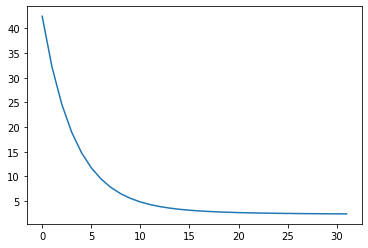

In [95]:
import matplotlib.pyplot as plt
full = LinearReg(gd_type = 'full', eta = 3.5e-3)
full.fit(X_train, y_train)
plt.plot(full.loss_history)

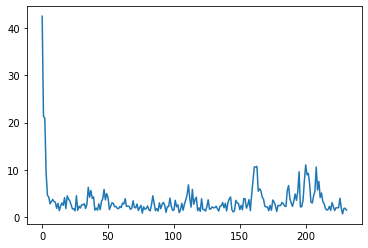

In [99]:
import matplotlib.pyplot as plt
stochastic = LinearReg(gd_type = 'stochastic', eta = 3.5e-3)
stochastic.fit(X_train, y_train)
plt.plot(stochastic.loss_history)

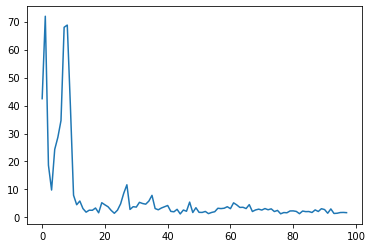

In [98]:
import matplotlib.pyplot as plt
momentum = LinearReg(gd_type = 'momentum', eta = 3.5e-3)
momentum.fit(X_train, y_train)
plt.plot(momentum.loss_history)

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### Бонус 

** Задание 7 (2 балла)**. Реализуйте линейную регрессию с функцией потерь MSE, обучаемую с помощью метода
[Adam](https://arxiv.org/pdf/1412.6980.pdf) - добавьте при необходимости параметры в класс модели, повторите пункты 5 и 6 и сравните результаты. 

** Задание 8 (2 балла)**. Реализуйте линейную регрессию с функцией потерь
$$ L(\hat{y}, y) = log(cosh(\hat{y} - y)),$$

обучаемую с помощью градиентного спуска.

** Задание 9 (0.01 балла)**.  Вставьте картинку с вашим любимым мемом в этот Jupyter Notebook